# Job Market Data Exploration

## Overview
This notebook explores the job data scraped from Naukri.com .

### Data Source
- **Platform**: Naukri.com
- **Keywords**: Data Scientist, Software Engineer, Python Developer, etc.
- **Pages per keyword**: 3

In [1]:
! pip install matplotlib seaborn

  Using cached matplotlib-3.10.6-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_10_13_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.6-cp313-cp313-macosx_10_13_x86_64.whl (8.3 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_10_13_x86_64.whl (293 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.0-cp313-cp313-macosx_10_13_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_10_13_x86_64.whl (66 kB)
Using cached pillow-11.3.0-cp313-cp313-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Load the latest scraped data
data_dir = Path("../data/raw")
csv_files = list(data_dir.glob("naukri_jobs_*.csv"))
latest_file = max(csv_files, key=lambda x: x.stat().st_mtime)



In [3]:
df = pd.read_csv(latest_file)
print(f"Loaded data: {latest_file.name}")
print(f"Shape: {df.shape}")
df.head()

Loaded data: naukri_jobs_20250921_191809.csv
Shape: (480, 14)


,job_id,title,company,location,experience,salary,description,skills,job_url,company_rating,posted_date,scraped_at,search_keyword,page_number
0,20925030402,Data Scientist / Machine Learning Engineer,KPMG Assurance and Consulting Services LLP,"Bangalore Rural, Bengaluru",4-9 Yrs,NaN,Use Cloud Tools (Nice to Have): Experience wit...,"['Data Science', 'Predictive Modeling', 'Verte...",https://www.naukri.com/job-listings-data-scien...,3.4,6 days ago,2025-09-21T19:18:38.377438,data-scientist,1
1,170925933956,Data Scientist-Artificial Intelligence,IBM,Bengaluru,3-7 Yrs,NaN,Bachelors Degree . Masters Degree . Required e...,"['python', 'pandas', 'tensorflow', 'pytorch', ...",https://www.naukri.com/job-listings-data-scien...,3.9,4 days ago,2025-09-21T19:18:39.109707,data-scientist,1
2,180925924508,Data Scientist-Artificial Intelligence,IBM,Bengaluru,3-7 Yrs,NaN,Required education . Bachelors Degree . Prefer...,"['python', 'scikit-learn', 'tensorflow', 'pyto...",https://www.naukri.com/job-listings-data-scien...,3.9,3 days ago,2025-09-21T19:25:20.814836,data-scientist,1
3,180925924086,Data Scientist-Artificial Intelligence,IBM,Bengaluru,3-7 Yrs,NaN,"As an Associate Data Scientist at IBM, you wil...","['python', 'scikit-learn', 'tensorflow', 'pyto...",https://www.naukri.com/job-listings-data-scien...,3.9,3 days ago,2025-09-21T19:25:21.084985,data-scientist,1
4,170925041097,Data Scientist,Oracle,Bengaluru,10-16 Yrs,NaN,Bachelors degree in computer science or relate...,"['Data scientist', 'AI', 'LLM', 'Machine Learn...",https://www.naukri.com/job-listings-data-scien...,3.6,3 days ago,2025-09-21T19:25:21.341173,data-scientist,1


In [6]:
# Basic statistics
print("Dataset Overview:")
print(f"Total jobs: {len(df)}")
print(f"Unique companies: {df['company'].nunique()}")
print(f"Unique locations: {df['location'].nunique()}")
print(f"Date range: {df['scraped_at'].min()} to {df['scraped_at'].max()}")


Dataset Overview:
Total jobs: 480
Unique companies: 284
Unique locations: 107
Date range: 2025-09-21T19:18:38.377438 to 2025-09-21T19:48:43.129499


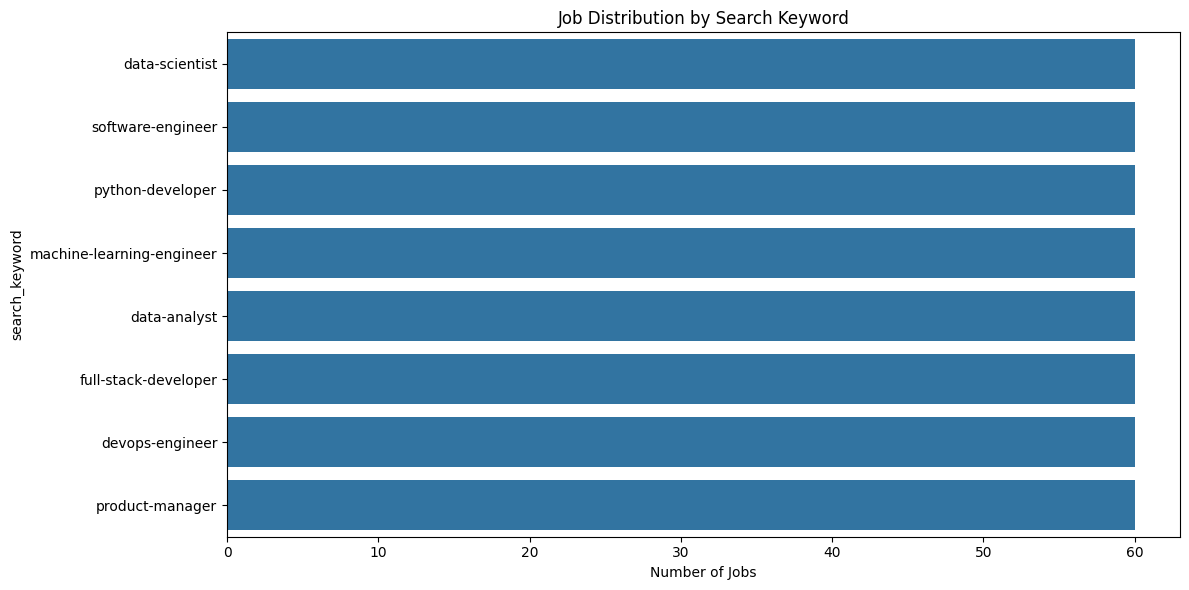

In [7]:
# Visualize job distribution by keyword
plt.figure(figsize=(12, 6))
keyword_counts = df['search_keyword'].value_counts()
sns.barplot(x=keyword_counts.values, y=keyword_counts.index)
plt.title('Job Distribution by Search Keyword')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

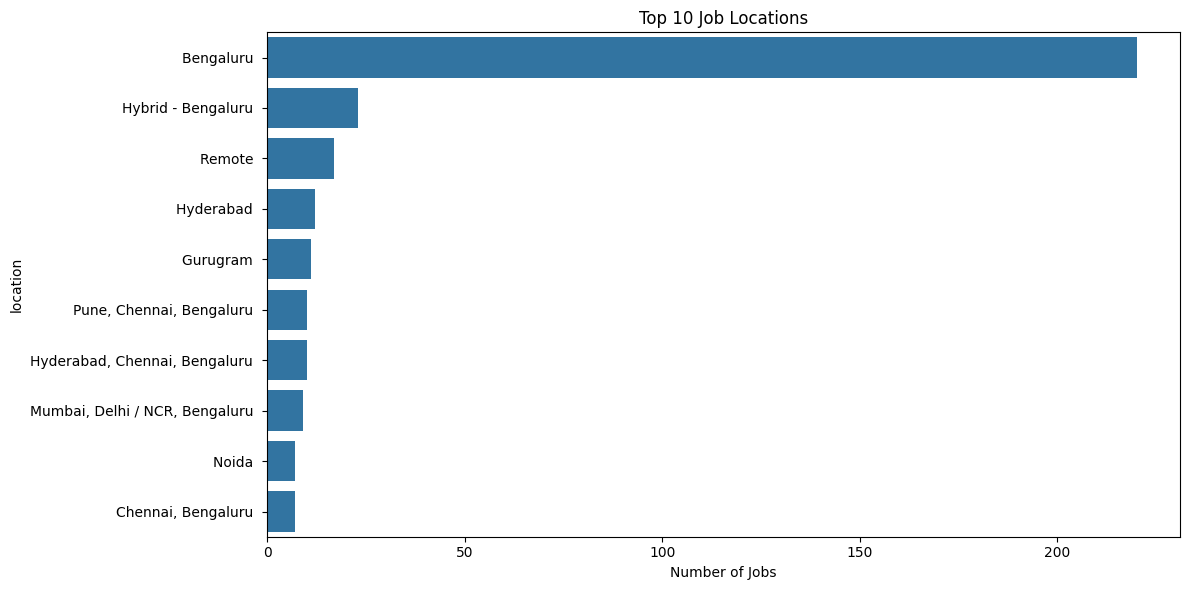

In [8]:
# Top locations
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()